In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

from IPython.display import display

%matplotlib inline

# sns.set(font="simhei")

特情数据

In [3]:
train_s = pd.read_csv('input/train/special-case.csv')
train_s.head()

,Airport,CTime,STime,ETime,Content
0,csx,2015-04-30 19:52:45Z,2015-05-01 12:00:00Z,2015-05-01 16:00:00Z,长沙机场航班延误黄色预警提示：预计明日（5月1日）12:00-16:00长沙黄花机场受雷雨天...
1,wuh,2015-05-01 08:13:39Z,2015-05-01 08:00:00Z,2015-05-01 12:00:00Z,目前，8时-12时雷雨，期间进出港航班可能受到影响。
2,khn,2015-05-01 08:14:18Z,2015-05-01 14:00:00Z,2015-05-01 17:00:00Z,预计，14时-17时小雷雨，期间进出港航班可能受到影响。
3,swa,2015-05-01 08:24:28Z,2015-05-01 13:00:00Z,2015-05-01 17:00:00Z,预计，13时-17时雷雨，期间进出港航班可能受到影响。
4,zha,2015-05-01 08:24:56Z,2015-05-01 13:00:00Z,2015-05-01 17:00:00Z,预计，13时-17时雷雨，期间进出港航班可能受到影响。


In [3]:
train_s.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15880 entries, 0 to 15879
Data columns (total 5 columns):
Airport    15877 non-null object
CTime      15869 non-null object
STime      15869 non-null object
ETime      15862 non-null object
Content    15868 non-null object
dtypes: object(5)
memory usage: 620.4+ KB


In [16]:
train_s.dropna(axis=0, inplace=True)

train_s['CTime'] = pd.to_datetime(train_s['CTime']).astype(np.int64) // 10 ** 9
train_s['STime'] = pd.to_datetime(train_s['STime']).astype(np.int64) // 10 ** 9
train_s['ETime'] = pd.to_datetime(train_s['ETime']).astype(np.int64) // 10 ** 9

train_s.sort_values(['Airport', 'STime', 'ETime'], ascending=True, inplace=True)

train_s['Airport'] = train_s['Airport'].str.upper()

train_s.head()

,Airport,CTime,STime,ETime,Content
2732,AAT,1447059964,1447059720,1447074000,道面积冰
2745,AAT,1447085303,1447080600,1447080600,跑道开放
2878,AAT,1448036125,1448035920,1448107200,积冰
2892,AAT,1448105097,1448105040,1448121600,跑道积冰
2898,AAT,1448118906,1448118720,1448118720,跑道开放


航班数据

In [5]:
train_1705 = pd.read_csv('input/train/fights-2017-05.csv')

display(train_1705.head())
train_1705.info()

,Departure,Destination,FLTNo,PDepartureTime,PArrivalTime,ADepartureTime,AArrivalTime,Id,IsCancel
0,PVG,CKG,9C8867,1495602600,1495613700,1.495605e+09,1.495613e+09,2798.0,正常
1,CAN,TAO,HU7275,1493947200,1493958600,1.493948e+09,1.493958e+09,1479.0,正常
2,KWE,KMG,GJ8661,1494775200,1494779400,1.494783e+09,1.494787e+09,2957.0,正常
3,WNZ,CSX,CZ6956,1495185600,1495191300,1.495188e+09,1.495193e+09,419.0,正常
4,ENH,WUH,CZ3841,1494460800,1494465000,1.494471e+09,1.494474e+09,1421.0,正常


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326557 entries, 0 to 326556
Data columns (total 9 columns):
Departure         326557 non-null object
Destination       326557 non-null object
FLTNo             326557 non-null object
PDepartureTime    326557 non-null int64
PArrivalTime      326557 non-null int64
ADepartureTime    317996 non-null float64
AArrivalTime      317875 non-null float64
Id                322561 non-null float64
IsCancel          326557 non-null object
dtypes: float64(3), int64(2), object(4)
memory usage: 22.4+ MB


In [6]:
train_1705.sort_values(['Departure', 'PDepartureTime'], ascending=True, inplace=True)

In [50]:
def is_special(row):
    return train_s[((train_s['Airport'] == row['Departure']) \
& (train_s['STime'] <= row['PDepartureTime']) \
& (train_s['ETime'] >= row['PDepartureTime']))].size

# train_1705.apply(is_special, axis=1)

idx = train_1705.index

j = -1
k = 0
m = n = j
last_ariport = ''
for i, row in train_s.iterrows():
    if last_ariport != row['Airport']:
        j = m = n = k
        print(j)
        while train_1705.loc[idx[k]]['Departure'] == train_1705.loc[idx[j]]['Departure'] and k < len(idx):
            k += 1
    
    if row['ETime'] < train_1705.loc[idx[j]]['PDepartureTime']:
        j += 1
        continue
    
    m = n
    while train_1705.loc[idx[n]]['PDepartureTime'] >= row['STime'] and train_1705.loc[idx[n]]['PDepartureTime'] <= row['ETime']:
        n += 1
    
    if j!=m:
        train_1705.loc[idx[j:m], 'IsSpecial'] = \
              (train_1705.loc[idx[j:m], :]['PDepartureTime'] >= row['STime']) \
              & (train_1705.loc[idx[j:m], :]['PDepartureTime'] <= row['ETime'])
#     j += 1
#     print(j, k)
#     break



0
2
414
481
490
997
1086
1314
1523
1724
1757
2484
3033
3593
3752
3839
3932
4181
19113
19115
19302
26863
30178
30263
30837
31187
42598
49551
62049
62067
62901
63141
63331
63347
63455
63534
63848
69360
69973
70007
70251
70472
71274
72041
72074
72355
72513
72601
76072
76278
76474
76505
76536
76569
76663
76737
76841
76992
82783
82806
83086
83211
87262
90166
99663
100175
100245
100861
101223
101350
101548
101572
106989
107449
107869
107872
108227
108258
108546
108731
108828
111616
111638
111787
111947
112070
112254
112534
113860
113950
114089
115532
115536
115808
116133
116224
116393
116468
116596
117062
117224
117334
118026
121006
121393
121411
135181
135595


KeyboardInterrupt: 

In [47]:
train_1705[train_1705['IsSpecial'] == True]

,Departure,Destination,FLTNo,PDepartureTime,PArrivalTime,ADepartureTime,AArrivalTime,Id,IsCancel,IsSpecial
66696,DCY,CKG,3U8164,1495167300,1495171800,1.495167e+09,1.495171e+09,1711.0,正常,1
249609,DCY,CKG,3U8164,1495685700,1495690200,1.495686e+09,1.495690e+09,761.0,正常,1


In [7]:
train_1705['Delay'] = (train_1705['ADepartureTime'] - train_1705['PDepartureTime']) / 60

train_1705['DelayRange'] = pd.cut(train_1705['Delay'], [0, 10, 20, 30, 60, 120, 180, 300, 720, np.inf])

train_1705.head(15)

,Departure,Destination,FLTNo,PDepartureTime,PArrivalTime,ADepartureTime,AArrivalTime,Id,IsCancel,Delay,DelayRange
300856,AAT,URC,CZ6844,1494136200,1494139800,NaN,NaN,NaN,取消,NaN,NaN
169467,AAT,AKU,UQ2004,1496068500,1496074200,NaN,NaN,NaN,取消,NaN,NaN
118525,ACX,KWE,G52930,1493602500,1493605200,1.493602e+09,1.493604e+09,1112.0,正常,-11.0,NaN
1428,ACX,SHA,MU5817,1493607900,1493618100,1.493609e+09,1.493617e+09,1336.0,正常,15.0,"(10.0, 20.0]"
271661,ACX,KWE,G52610,1493609700,1493612100,1.493609e+09,1.493611e+09,834.0,正常,-5.0,NaN
116235,ACX,LHW,DZ6229,1493611500,1493619900,1.493612e+09,1.493620e+09,1953.0,正常,7.0,"(0.0, 10.0]"
55761,ACX,WUH,GJ8818,1493613600,1493620500,1.493613e+09,1.493620e+09,2622.0,正常,-3.0,NaN
212315,ACX,NAY,KN5202,1493616900,1493628000,1.493617e+09,1.493627e+09,3201.0,正常,-5.0,NaN
151452,ACX,KWE,G52602,1493619900,1493622600,1.493619e+09,1.493623e+09,834.0,正常,-10.0,NaN
106606,ACX,KWE,G52614,1493630100,1493632800,1.493631e+09,1.493633e+09,834.0,正常,9.0,"(0.0, 10.0]"


延误时间分布

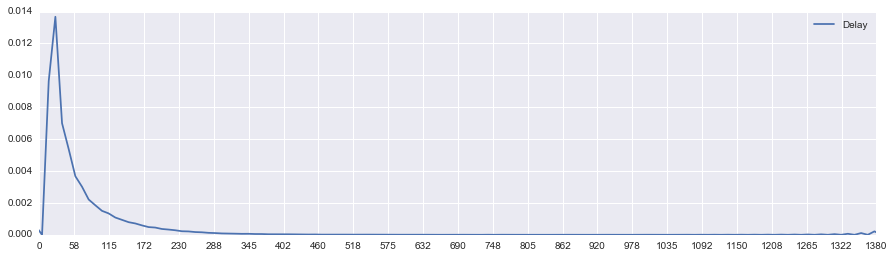

In [29]:
plt.figure(figsize=(15, 4))
g = sns.kdeplot(train_1705.loc[((~train_1705['Delay'].isnull()) & (train_1705['Delay'] > 0)), 'Delay'])
g.set_xlim(0, train_1705['Delay'].max())
g.xaxis.set_major_locator(ticker.LinearLocator(25))

In [8]:
train_1705['DelayRange'].value_counts()

(0, 10]       69045
(10, 20]      64463
(30, 60]      49311
(20, 30]      36480
(60, 120]     34479
(120, 180]    13042
(180, 300]     8172
(300, 720]     2414
(720, inf]       57
Name: DelayRange, dtype: int64

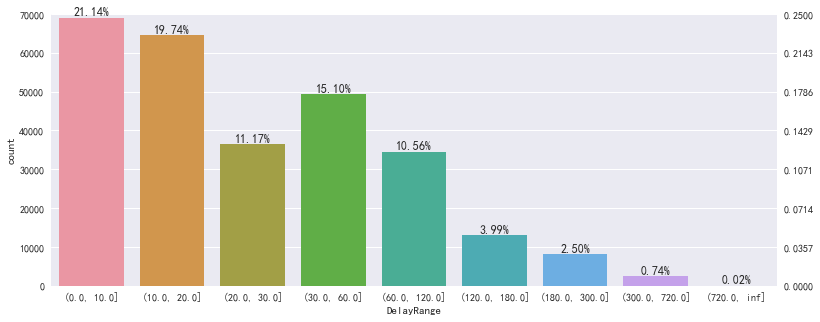

In [9]:


plt.figure(figsize=(13, 5))
g = sns.countplot(train_1705['DelayRange'])


ncount = len(train_1705)
for p in g.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    g.annotate('{:.2f}%'.format(100.*y/ncount), (x.mean(), y), ha='center', va='bottom') # set the alignment of the text

g2 = g.twinx()
g2.grid(None)

# Use a LinearLocator to ensure the correct number of ticks
g.set_ylim(0, 70000)
g.yaxis.set_major_locator(ticker.LinearLocator(8))

g2.set_ylim(0, 0.25)
g2.yaxis.set_major_locator(ticker.LinearLocator(8))

In [47]:
train_1705['PDepartureTime'] = pd.to_datetime(train_1705['PDepartureTime'], unit='s')
train_1705['PArrivalTime'] = pd.to_datetime(train_1705['PArrivalTime'], unit='s')
train_1705['ADepartureTime'] = pd.to_datetime(train_1705['ADepartureTime'], unit='s')
train_1705['AArrivalTime'] = pd.to_datetime(train_1705['AArrivalTime'], unit='s')

train_1705.head()

,Departure,Destination,FLTNo,PDepartureTime,PArrivalTime,ADepartureTime,AArrivalTime,Id,IsCancel,Delay,DelayRange
0,PVG,CKG,9C8867,2017-05-24 05:10:00,2017-05-24 08:15:00,2017-05-24 05:44:00,2017-05-24 08:07:00,2798.0,正常,34.0,"(30.0, 60.0]"
1,CAN,TAO,HU7275,2017-05-05 01:20:00,2017-05-05 04:30:00,2017-05-05 01:38:00,2017-05-05 04:17:00,1479.0,正常,18.0,"(10.0, 20.0]"
2,KWE,KMG,GJ8661,2017-05-14 15:20:00,2017-05-14 16:30:00,2017-05-14 17:34:00,2017-05-14 18:32:00,2957.0,正常,134.0,"(120.0, 180.0]"
3,WNZ,CSX,CZ6956,2017-05-19 09:20:00,2017-05-19 10:55:00,2017-05-19 10:01:00,2017-05-19 11:19:00,419.0,正常,41.0,"(30.0, 60.0]"
4,ENH,WUH,CZ3841,2017-05-11 00:00:00,2017-05-11 01:10:00,2017-05-11 02:47:00,2017-05-11 03:39:00,1421.0,正常,167.0,"(120.0, 180.0]"


In [48]:
train_1705.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326557 entries, 0 to 326556
Data columns (total 11 columns):
Departure         326557 non-null object
Destination       326557 non-null object
FLTNo             326557 non-null object
PDepartureTime    326557 non-null datetime64[ns]
PArrivalTime      326557 non-null datetime64[ns]
ADepartureTime    317996 non-null datetime64[ns]
AArrivalTime      317875 non-null datetime64[ns]
Id                322561 non-null float64
IsCancel          326557 non-null object
Delay             317996 non-null float64
DelayRange        277463 non-null category
dtypes: category(1), datetime64[ns](4), float64(2), object(4)
memory usage: 25.2+ MB


机场延误情况

In [57]:
for i, row in train_1705.iterrows():
    print(len(train_1705[(train_1705['Departure'] == row['Departure']) 
                     & (row['PDepartureTime'] - train_1705['PDepartureTime'] > 120 * 60 )
                     & (row['PDepartureTime'] - train_1705['PDepartureTime'] < 360 * 60 )]))
#     print((row['PDepartureTime'] - train_1705['PDepartureTime'])[1])
    break

105


In [77]:
train_1705 = train_1705.loc[:2000,]

In [78]:
def qz_count(row):
    return len(train_1705[(train_1705['Departure'] == row['Departure']) 
                     & (row['PDepartureTime'] - train_1705['PDepartureTime'] > 120 * 60 )
                     & (row['PDepartureTime'] - train_1705['PDepartureTime'] < 360 * 60 )])

train_1705.apply(qz_count, axis=1)

KeyboardInterrupt: 